# Sampling Methods #
## Joon Yuhl Soh ##

With the CHD data set (CHDdata.csv ) from Homework 2 develop a
sampling based estimate for the posterior distributions of the parameters
in a main effects logistic regression model. Use all predictor variables
in the data set and standardize all of the numeric, continuous predictors
using the mean and standard deviation.


• Use Gaussian or Cauchy priors with hyperparameters appropriate
for uninformed priors and show the graphical representation of your
model (you should use graphviz for this).


• Show the summary table and trace plots from the sampling and
briefly say what they mean for your results.


• Provide forest plots of the parameters and discuss what these results
imply for the relevant predictor variables and the overall model.


In [113]:
data_c = pd.read_csv("CHDdata.csv")
data_c.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Fist, make sure categorical values are recorded properly

In [114]:
replace_map = {
    'famhist':{
        'Absent':-1,
        'Present':1
    },
    'chd':{
        1:0.9999,
        0:0.0001
    }
}
data_c = data_c.replace(replace_map)
data_c.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,0.9999
1,144,0.01,4.41,28.61,-1,55,28.87,2.06,63,0.9999
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0.0001
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,0.9999
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,0.9999


Then make sure other colums are also standardized. 

In [115]:
numCols = ['sbp', 'tobacco', 'ldl', 'adiposity','typea','obesity','alcohol','age']
for i in numCols :
    data_c[i] = (data_c[i] - data_c[i].mean()) / data_c[i].std()
data_c.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1.057417,1.821099,0.477894,-0.295183,1,-0.418017,-0.176594,3.274189,0.628654,0.9999
1,0.276789,-0.789382,-0.159507,0.411694,-1,0.193134,0.670646,-0.612081,1.381617,0.9999
2,-0.991731,-0.774141,-0.608585,0.883374,1,-0.112441,0.734723,-0.540597,0.217947,0.0001
3,1.545310,0.841352,0.806252,1.622382,1,-0.214300,1.411091,0.294742,1.039361,0.9999
4,-0.211103,2.169453,-0.598928,0.305020,1,0.702427,-0.012842,1.645991,0.423301,0.9999


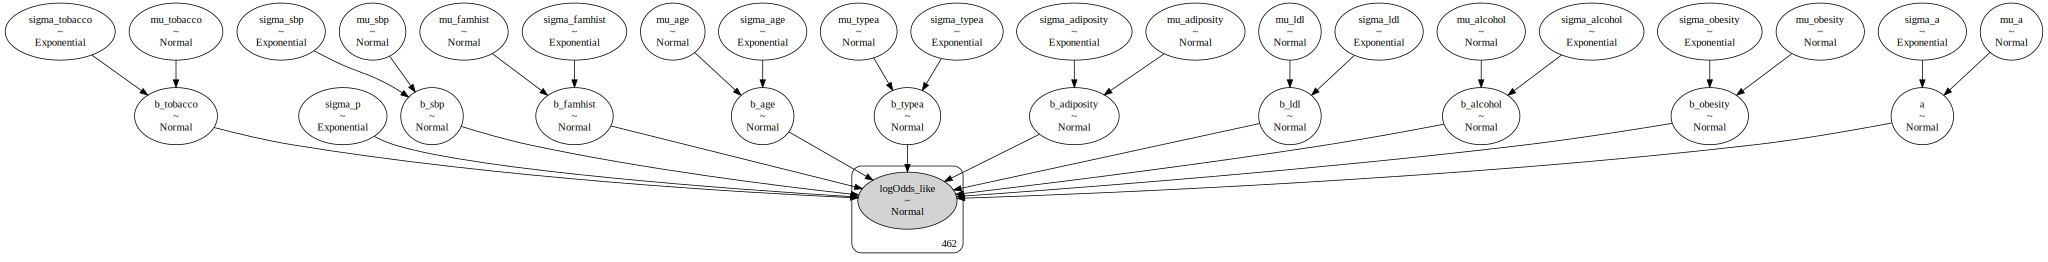

In [116]:
with Model() as varying_logOdds:

    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=9999)
    sigma_a = pm.Exponential("sigma_a", 1)
    
    mu_sbp = pm.Normal('mu_sbp', mu=0, sd=9999)
    sigma_sbp = pm.Exponential("sigma_sbp", 1)
    
    mu_tobacco = pm.Normal('mu_tobacco', mu=0, sd=9999)
    sigma_tobacco = pm.Exponential("sigma_tobacco", 1)
    
    mu_ldl = pm.Normal('mu_ldl', mu=0, sd=9999)
    sigma_ldl = pm.Exponential("sigma_ldl", 1)
    
    mu_adiposity = pm.Normal('mu_adiposity', mu=0, sd=9999)
    sigma_adiposity = pm.Exponential("sigma_adiposity", 1)
    
    mu_famhist = pm.Normal('mu_famhist', mu=0, sd=9999)
    sigma_famhist = pm.Exponential("sigma_famhist", 1)
    
    mu_typea = pm.Normal('mu_typea', mu=0, sd=9999)
    sigma_typea = pm.Exponential("sigma_typea", 1)
    
    mu_obesity = pm.Normal('mu_obesity', mu=0, sd=9999)
    sigma_obesity = pm.Exponential("sigma_obesity", 1)
    
    mu_alcohol = pm.Normal('mu_alcohol', mu=0, sd=9999)
    sigma_alcohol = pm.Exponential("sigma_alcohol", 1)
    
    mu_age = pm.Normal('mu_age', mu=0, sd=9999)
    sigma_age = pm.Exponential("sigma_age", 1)
    
    # Random intercepts
    a = pm.Normal('a', mu=mu_a, sd=sigma_a)
    # Random slopes
    b_sbp = pm.Normal('b_sbp', mu=mu_sbp, sd=sigma_sbp)
    b_tobacco = pm.Normal('b_tobacco', mu=mu_tobacco, sd=sigma_tobacco)
    b_ldl = pm.Normal('b_ldl', mu=mu_ldl, sd=sigma_ldl)
    b_adiposity = pm.Normal('b_adiposity', mu=mu_adiposity, sd=sigma_adiposity)
    b_famhist = pm.Normal('b_famhist', mu=mu_famhist, sd=sigma_famhist)
    b_typea = pm.Normal('b_typea', mu=mu_typea, sd=sigma_typea)
    b_obesity = pm.Normal('b_obesity', mu=mu_obesity, sd=sigma_obesity)
    b_alcohol = pm.Normal('b_alcohol', mu=mu_alcohol, sd=sigma_alcohol)
    b_age = pm.Normal('b_age', mu=mu_age, sd=sigma_age)
    
    # Expected value
    logOdds_hat = a + b_sbp * data_c.sbp.values + b_tobacco * data_c.tobacco.values + b_ldl * data_c.ldl.values + b_adiposity * data_c.adiposity.values + b_famhist * data_c.famhist.values + b_typea * data_c.typea.values + b_obesity * data_c.obesity.values + b_alcohol * data_c.alcohol.values + b_age * data_c.age.values
    
    sigma_p = pm.Exponential("sigma_p", 1)
    logOdds_true = tt.log(data_c.chd.values / (1 - data_c.chd.values))
    
    # Data likelihood
    logOdds_like = pm.Normal('logOdds_like', mu=logOdds_hat, sd=sigma_p, observed=logOdds_true)

pm.model_to_graphviz(varying_logOdds)

In [117]:
with varying_logOdds:
    varying_logOdds_trace = pm.sample(500, step = pm.NUTS(target_accept = 0.99), cores = 6, tune=5000)
    varying_logOdds_idata = az.from_pymc3(varying_logOdds_trace)
az.summary(varying_logOdds_idata, round_to=2)

Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sigma_p, b_age, b_alcohol, b_obesity, b_typea, b_famhist, b_adiposity, b_ldl, b_tobacco, b_sbp, a, sigma_age, mu_age, sigma_alcohol, mu_alcohol, sigma_obesity, mu_obesity, sigma_typea, mu_typea, sigma_famhist, mu_famhist, sigma_adiposity, mu_adiposity, sigma_ldl, mu_ldl, sigma_tobacco, mu_tobacco, sigma_sbp, mu_sbp, sigma_a, mu_a]


Sampling 6 chains for 5_000 tune and 500 draw iterations (30_000 + 3_000 draws total) took 1389 seconds.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_a,-2.55,1.46,-5.75,0.24,0.06,0.04,544.13,544.13,762.35,540.15,1.00
mu_sbp,0.49,1.43,-2.13,3.05,0.07,0.06,444.84,291.23,810.72,628.92,1.01
mu_tobacco,1.44,1.39,-1.32,3.81,0.05,0.03,939.24,828.18,1292.55,1087.44,1.00
mu_ldl,1.35,1.43,-1.19,4.51,0.05,0.04,922.90,726.66,1276.63,843.57,1.00
mu_adiposity,0.28,1.60,-3.29,3.05,0.05,0.04,1068.16,828.23,1194.18,1069.84,1.00
mu_famhist,1.55,1.24,-0.65,3.90,0.03,0.03,1273.64,1038.74,1475.06,1317.54,1.00
mu_typea,1.13,1.32,-1.31,3.75,0.04,0.04,883.91,685.27,1245.49,1007.16,1.00
mu_obesity,-0.88,1.52,-3.81,1.88,0.05,0.04,1070.74,898.04,1368.85,955.69,1.01
mu_alcohol,-0.13,1.41,-3.05,2.46,0.05,0.04,862.38,758.81,1047.83,848.65,1.00
mu_age,1.84,1.51,-1.09,4.97,0.05,0.04,851.64,851.64,1010.23,899.29,1.01


The table above shows the summary statistics for all of the parameters used in my model. For instance, you can get the mean, std, etc. for all of the means and standard deviations used to model each distribution used in the model. The means far from 0 with small std would be worth noting. In my case, beta for a few predictors, such as age, seems promising.

C:\Users\joony\anaconda3\lib\site-packages\arviz\plots\traceplot.py:195: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (31), generating only 20 plots
  UserWarning,


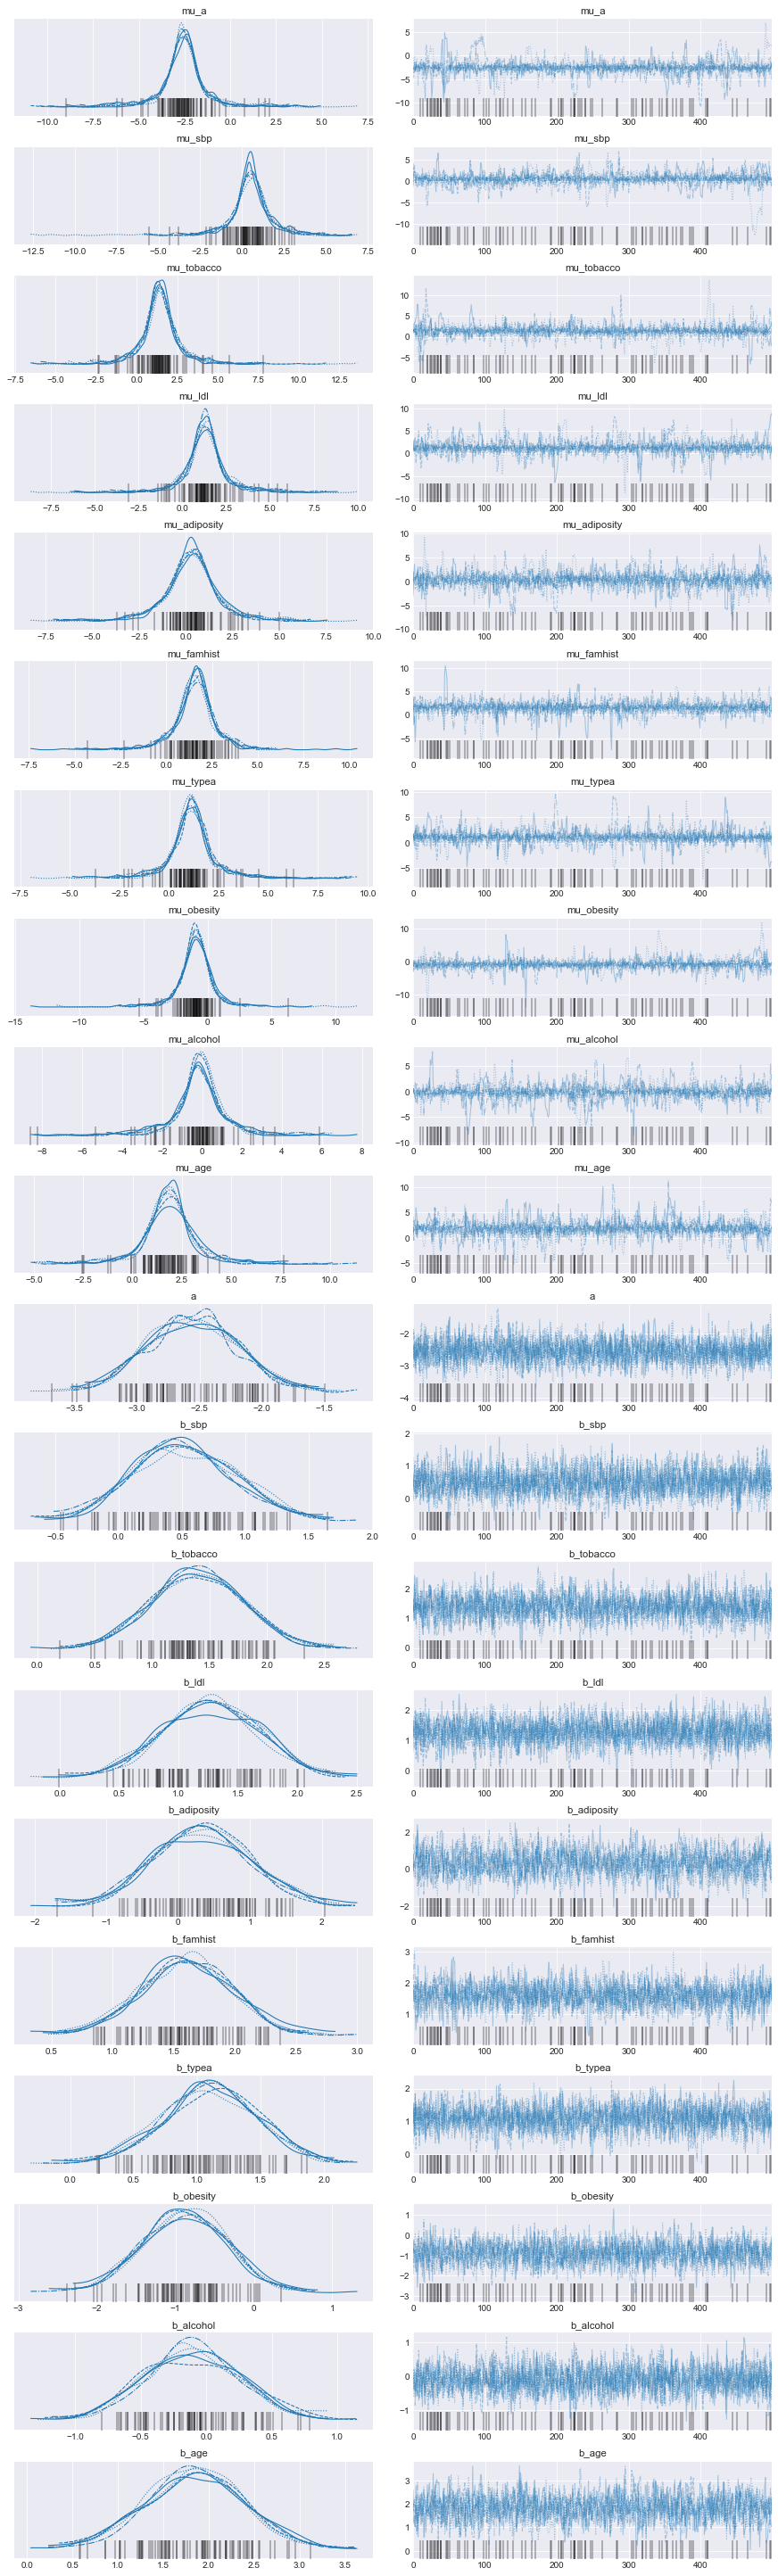

In [118]:
with varying_logOdds:
    pm.traceplot(varying_logOdds_trace)

The trace plot above shows you the distributioons made throughout the process, in which we can see if they converged or not. In these plots, they seems to converge. 

In [119]:
var_n =['a','b_sbp','b_tobacco','b_ldl','b_adiposity','b_famhist','b_typea','b_obesity','b_alcohol', 'b_age']


<Figure size 432x1296 with 0 Axes>

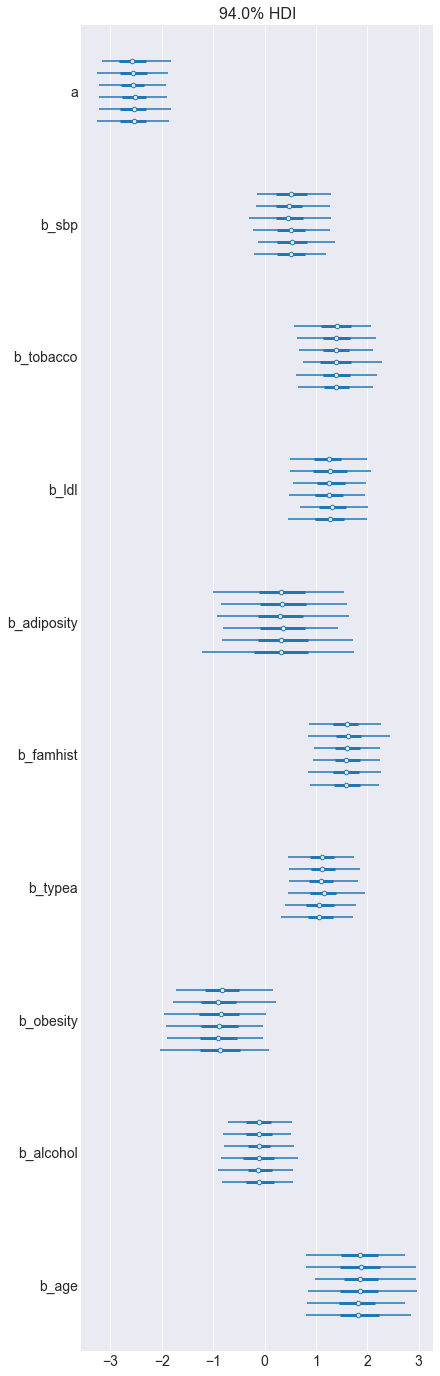

In [120]:
with varying_logOdds:
    pp.figure(figsize=(6,18))
    pm.forestplot(varying_logOdds_trace, var_names=var_n);

Based on these plots, I concluded that the predictors except sbp, adiposity, obesity, and alcohol are more useful. I may benefit from including only the predictors that are not sbp, adiposity, obesity, and alcohol. Especially, alcohol and adiposity do not seem promising. 